## Observations and Insights 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice.
count_mice = mouse_df["Mouse ID"]
len(count_mice)

1893

In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

tp_zero = mouse_df.loc[mouse_df["Timepoint"]
== 0]
mouse_list = tp_zero['Mouse ID']
correct_mice = []
for mouse in mouse_list:
    if mouse not in correct_mice:
        correct_mice.append(mouse)
    else:
        extra = mouse
extra


'g989'

In [65]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_df = mouse_df[mouse_df["Mouse ID"] == extra]
dupe_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dupe_mouse = [909,911,913,915,917]

clean_mouse_df = mouse_df.drop(dupe_mouse, axis=0)
tp_mouse = mouse_df.drop(909)
clean_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the clean DataFrame.
clean_count_mice = clean_mouse_df["Mouse ID"]
len(clean_count_mice)

1888

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#pandas summary
drug_list = clean_mouse_df["Drug Regimen"].unique()
# = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]== drug]
pd_mean = []
pd_median = []
pd_var = []
pd_std = []
pd_sem = []
for drug in drug_list:
    drug_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]== drug]
    pd_mean.append(drug_df["Tumor Volume (mm3)"].mean())
    pd_median.append(drug_df["Tumor Volume (mm3)"].median())
    pd_var.append(drug_df["Tumor Volume (mm3)"].var())
    pd_std.append(drug_df["Tumor Volume (mm3)"].std())
    pd_sem.append(drug_df["Tumor Volume (mm3)"].sem())
    
summary_table = pd.DataFrame({
    "Drugs": drug_list,
    "Mean": pd_mean,
    "Median": pd_median,
    "Variance": pd_var,
    "Standard Deviation": pd_std,
    "SEM": pd_sem
})

summary_table



,Drugs,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
complete_groupby = clean_mouse_df.groupby("Drug Regimen")

summary_table = complete_groupby.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [70]:
clean_mouse_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


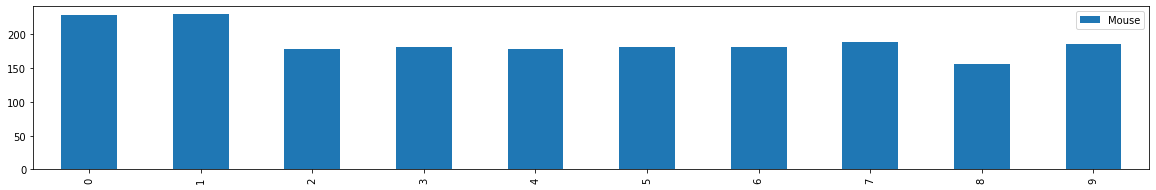

In [71]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drugs = clean_mouse_df["Drug Regimen"].unique()
mice = []
drugs = clean_mouse_df["Drug Regimen"].unique()
for drug in drugs:
    drugs_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == drug]
    mice.append(len(drugs_df))

mouse_drug = pd.DataFrame({
    "Drug": drugs,
    "Mouse": mice})

mouse_drug.plot(kind="bar", figsize=(20,3))




<Figure size 1440x216 with 0 Axes>

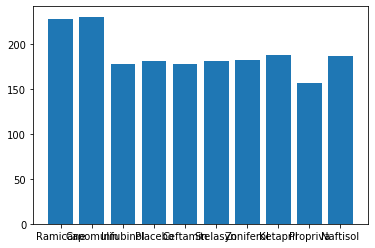

<Figure size 1440x216 with 0 Axes>

In [72]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


plt.bar(drugs, mice)
plt.figure(figsize=(20,3))


In [73]:
tp_zero.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


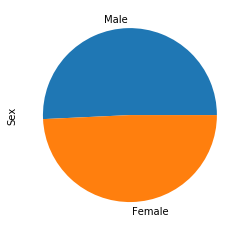

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = clean_mouse_df.Sex.value_counts()
gender_counts.plot(kind="pie")


([<matplotlib.patches.Wedge at 0x2ced4f8a208>,
 [Text(-0.025622895044835736, 1.0997015355311284, ''),
  Text(0.025622792083347525, -1.099701537930112, '')])

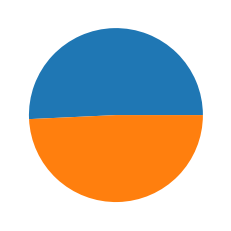

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = gender_counts
plt.pie(sizes)


## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_treatment =  clean_mouse_df.loc[clean_mouse_df["Timepoint"] == 45]
last_treatment = last_treatment.reset_index()
last_treatment = last_treatment.drop("index", axis=1)
drug_index = last_treatment.set_index("Drug Regimen")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
find_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
tumors = drug_index.loc[ "Ramicane", 'Tumor Volume (mm3)']
for drug in find_drugs:
    tumors = drug_index.loc[drug, 'Tumor Volume (mm3)']
    tumor_data.append(tumors)
    quartiles = tumors.quantile([0.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    outliers = []
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"The lower quartile of treatment is: {lowerq}")
    print(f"The upper quartile of treatment is: {upperq}")
    print(f"The interquartile range of treatment is: {iqr}")
    print(f"The median of treatment is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print()    

The lower quartile of treatment is: 32.37735684
The upper quartile of treatment is: 40.1592203
The interquartile range of treatment is: 7.781863460000004
The median of treatment is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of treatment is: 30.981175224999998
The upper quartile of treatment is: 38.508305307499995
The interquartile range of treatment is: 7.527130082499998
The median of treatment is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.

The lower quartile of treatment is: 62.75445141
The upper quartile of treatment is: 67.68556862
The interquartile range of treatment is: 4.9311172099999965
The median of treatment is: 66.08306589
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.

The lower quartile of treatment is: 61.43389223
The upper quartile of treatment is: 67.52748237


[Drug Regimen
 Capomulin    23.343598
 Capomulin    28.484033
 Capomulin    28.430964
 Capomulin    31.023923
 Capomulin    31.896238
 Capomulin    32.377357
 Capomulin    33.329098
 Capomulin    34.455298
 Capomulin    37.311846
 Capomulin    36.041047
 Capomulin    37.074024
 Capomulin    38.846876
 Capomulin    38.939633
 Capomulin    38.982878
 Capomulin    38.125164
 Capomulin    40.658124
 Capomulin    40.159220
 Capomulin    40.728578
 Capomulin    41.483008
 Capomulin    41.581521
 Capomulin    47.685963
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Ramicane    22.050126
 Ramicane    29.128472
 Ramicane    30.276232
 Ramicane    30.564625
 Ramicane    30.638696
 Ramicane    31.560470
 Ramicane    31.095335
 Ramicane    33.397653
 Ramicane    32.978522
 Ramicane    33.562402
 Ramicane    36.134852
 Ramicane    38.810366
 Ramicane    37.225650
 Ramicane    36.374510
 Ramicane    37.311236
 Ramicane    38.407618
 Ramicane    40.659006
 Ramicane    40.667713
 Ramicane  

(10, 80)

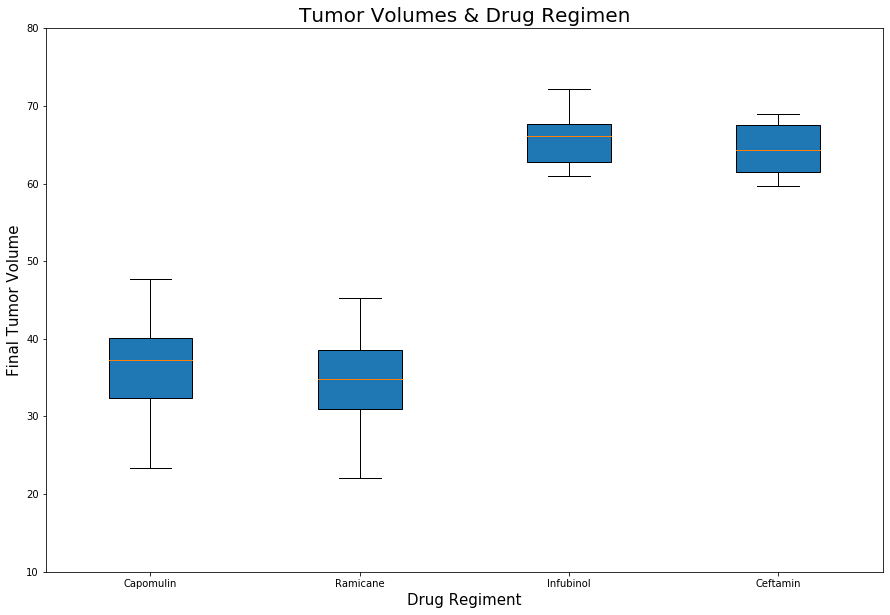

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title("Tumor Volumes & Drug Regimen", fontsize = 20)
ax1.set_ylabel("Final Tumor Volume", fontsize = 15)
ax1.set_xlabel("Drug Regiment", fontsize = 15)

ax1.boxplot(tumor_data, labels = find_drugs, widths = 0.4, patch_artist = True, vert = True)
plt.ylim(10,80)


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
